This project focuses on analyzing state‑level home care data to identify the key factors that influence star ratings. The analysis began with exploratory data examination using the HH_State_Oct2025.csv file.

In [79]:
# Include libraries for data exploratory
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Load the dataset
df = pd.read_csv("HH_State_Oct2025.csv")

In [81]:
# Checking the data dimensions
print("Dataset Shape:", df.shape)

Dataset Shape: (55, 25)


In [82]:
# Checking column names and converts it into a list
print("\nColumn Names:", df.columns.tolist())


Column Names: ['State', 'Quality of Patient Care Star Rating', 'Star Rating 1 Percentage', 'Star Rating 1.5 Percentage', 'Star Rating 2 Percentage', 'Star Rating 2.5 Percentage', 'Star Rating 3 Percentage', 'Star Rating 3.5 Percentage', 'Star Rating 4 Percentage', 'Star Rating 4.5 Percentage', 'Star Rating 5 Percentage', "How often the home health team began their patients' care in a timely manner", 'How often the home health team determined whether patients received a flu shot for the current flu season', 'How often patients got better at walking or moving around', 'How often patients got better at getting in and out of bed', 'How often patients got better at bathing', "How often patients' breathing improved", 'How often patients got better at taking their drugs correctly by mouth', 'Changes in Skin Integrity post-acute care: pressure ulcer/injury', 'How often physician-recommended actions to address medication issues were completely timely', 'Percent of Residents Experiencing One or

In [83]:
#Checking the data type of each column (object: textual/string; float64: numbers)
print("\nData Types:\n", df.dtypes)


Data Types:
 State                                                                                                                                      object
Quality of Patient Care Star Rating                                                                                                       float64
Star Rating 1 Percentage                                                                                                                  float64
Star Rating 1.5 Percentage                                                                                                                float64
Star Rating 2 Percentage                                                                                                                  float64
Star Rating 2.5 Percentage                                                                                                                float64
Star Rating 3 Percentage                                                                                      

In [84]:
#Checking if the data contain missing values (NaN)
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 State                                                                                                                                     0
Quality of Patient Care Star Rating                                                                                                       0
Star Rating 1 Percentage                                                                                                                  0
Star Rating 1.5 Percentage                                                                                                                0
Star Rating 2 Percentage                                                                                                                  0
Star Rating 2.5 Percentage                                                                                                                0
Star Rating 3 Percentage                                                                                                                  0
St

In [85]:
#Generate summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Quality of Patient Care Star Rating  Star Rating 1 Percentage  \
count                            55.000000                 55.000000   
mean                              3.281818                  0.940000   
std                               0.416818                  1.655204   
min                               2.000000                  0.000000   
25%                               3.000000                  0.000000   
50%                               3.500000                  0.000000   
75%                               3.500000                  1.285000   
max                               4.000000                  7.140000   

       Star Rating 1.5 Percentage  Star Rating 2 Percentage  \
count                   55.000000                 55.000000   
mean                     3.617636                  7.894727   
std                      5.197581                  6.732179   
min                      0.000000                  0.000000   
25%           

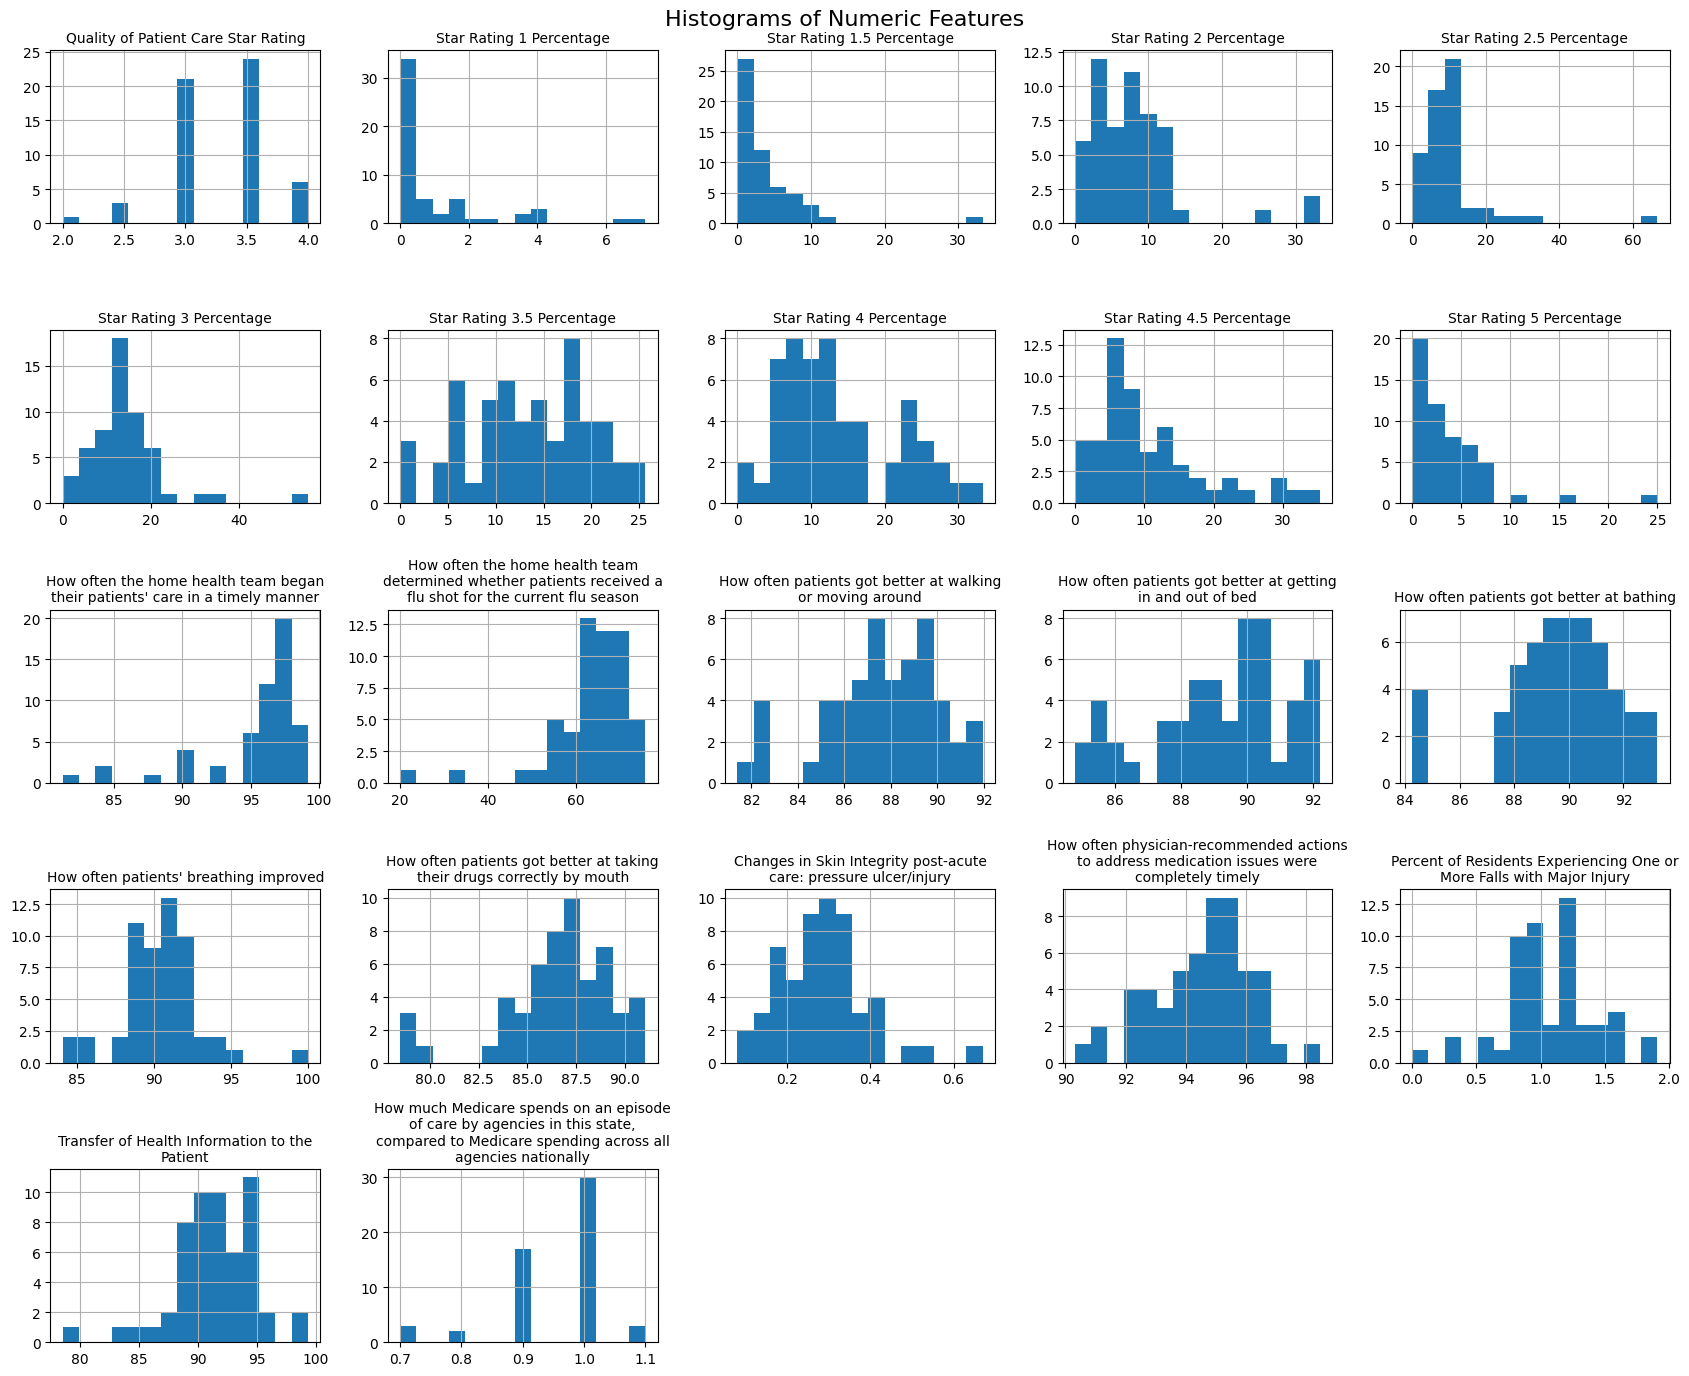

In [88]:
#Build histograms for numeric columns

import textwrap

#numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = df.select_dtypes(include=['float64']).columns
axes = df[numeric_cols].hist(figsize=(17, 14), bins=15)

# Wrap column names every 40 letters
for ax, col in zip(axes.ravel(), numeric_cols):
        wrapped_title = "\n".join(textwrap.wrap(col, width=40))  # Wrap every 40 characters
        ax.set_title(wrapped_title, fontsize=10)

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


Now, we have explored the data, we will use 80% of the data as training set to build the model using RandomForestRegressor. 

In [91]:
#Define target & leakage columns (I've to add this to ensure the important features graph will not include the "Star Rating %" information)
target_col = 'Quality of Patient Care Star Rating'
leak_cols = [c for c in df.columns if c.startswith('Star Rating') and 'Percentage' in c]

#Split the data into features and target
#X = df[numeric_cols].drop(columns=['Quality of Patient Care Star Rating'])
#y = df['Quality of Patient Care Star Rating']
X = df[numeric_cols].drop(columns=[target_col] + leak_cols)
y = df[target_col]

#Split your data with 20% test/ 80% training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the value in the columns to be standard, 3 of numeric columns are not in %
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [92]:
#Train the model using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [93]:
y_pred = model.predict(X_test_scaled)

In [94]:

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#Calculate MSE for predictions
mse = mean_squared_error(y_test, y_pred)
print("The MSE of the model is {}.".format(mse))

# Calculate r2 for predictions
r2 = r2_score(y_test, y_pred)
print("The R2 value of the model is {}.".format(r2))

The MSE of the model is 0.1273659090909091.
The R2 value of the model is 0.559677857142857.


The MSE of the model is low, indicating that its predictions are close to actual values. However, the R2 score is not so accurate with only 0.56, which suggests the model explains just over half of the variance in the data. To improve model performance, additional data may be required. 
In the meantime, we can analyze which features show strong positive associations with higher star ratings. This analysis could provide valuable insights for refining the model in the future.

In [95]:
# Get feature importance from the trained RandomForest model
importances = model.feature_importances_
feature_names = X.columns

In [96]:
# Create a DataFrame for easy sorting
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [97]:
# Show Top 10 features
top10 = fi_df.head(10)
print("\nTop 10 Features Influencing Quality of Patient Care Star Rating:")
print(top10)


Top 10 Features Influencing Quality of Patient Care Star Rating:
                                             Feature  Importance
2  How often patients got better at walking or mo...    0.369602
3  How often patients got better at getting in an...    0.232585
4           How often patients got better at bathing    0.122870
0  How often the home health team began their pat...    0.071865
6  How often patients got better at taking their ...    0.055720
5             How often patients' breathing improved    0.032755
7  Changes in Skin Integrity post-acute care: pre...    0.030392
9  Percent of Residents Experiencing One or More ...    0.023277
8  How often physician-recommended actions to add...    0.022401
1  How often the home health team determined whet...    0.021530


Text(0.5, 1.0, 'Top 10 Features Influencing Star Rating')

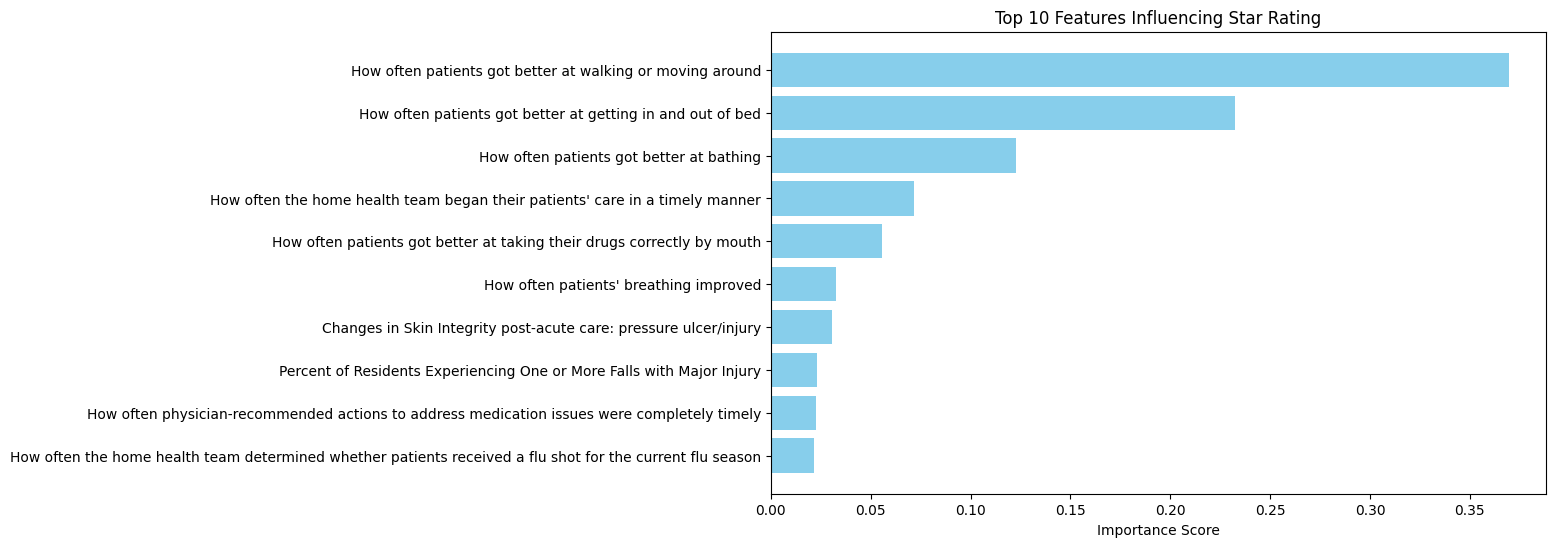

In [98]:
# Plot Top 10
plt.figure(figsize=(10, 6))
plt.barh(top10['Feature'][::-1], top10['Importance'][::-1], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Features Influencing Star Rating')

 The top three features influencing star ratings appear to be improvements in patients’ ability to walk or move around, get in and out of bed, and bathe independently. In contrast, the feature with the least impact is whether the home care team determined if patients received a flu shot during the current flu season. Given its low influence, it would be interesting to explore how the star rating might change if flu shot compliance were improved by 10%.

In [99]:
# Define column name for flu shot compliance
flu_col = "How often the home health team determined whether patients received a flu shot for the current flu season"

# Check if the column exists in X
if flu_col in X.columns:

# 1) Predict current ratings for all states
    X_full_scaled = scaler.transform(X)
    baseline_pred = model.predict(X_full_scaled)

# 2) Create a copy and increase flu shot compliance by +10 percentage points (max 100)
    X_whatif = X.copy()
    X_whatif[flu_col] = (X_whatif[flu_col] + 10).clip(upper=100)

# 3) Predict new ratings
    X_whatif_scaled = scaler.transform(X_whatif)
    whatif_pred = model.predict(X_whatif_scaled)

# 4) Calculate change
    delta = whatif_pred - baseline_pred
    avg_change = delta.mean()

    print("\nWhat-if Scenario: +10% Flu Shot Compliance")
    print(f"Average predicted rating change: {avg_change:+.2f} stars")


What-if Scenario: +10% Flu Shot Compliance
Average predicted rating change: +0.00 stars


Although, on average, no improvement in star ratings was predicted across all states, we would like to examine whether there are specific states where the rating could increase if flu shot compliance were raised by 10%. Identifying such states would allow us to focus our efforts strategically.

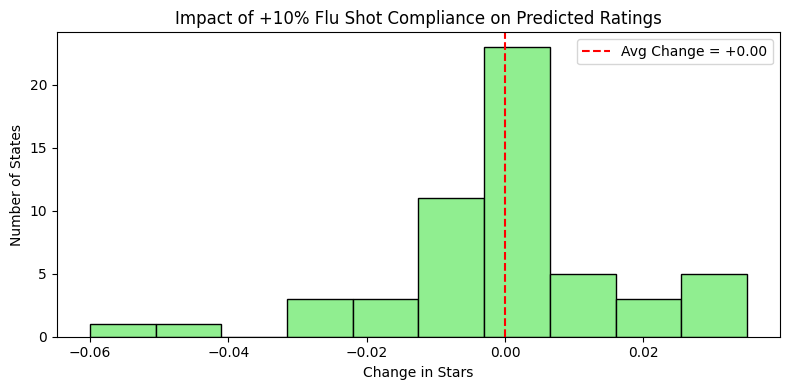

In [77]:
    #Plot the star rating based on states distribution
    plt.figure(figsize=(8, 4))
    plt.hist(delta, bins=10, color="lightgreen", edgecolor="black")
    plt.axvline(avg_change, color="red", linestyle="--", label=f"Avg Change = {avg_change:+.2f}")
    plt.title("Impact of +10% Flu Shot Compliance on Predicted Ratings")
    plt.xlabel("Change in Stars")
    plt.ylabel("Number of States")
    plt.legend()
    plt.tight_layout()
    plt.show()

From the histogram showing state distribution versus changes in star ratings, we can see that ratings could improve in certain states if we focus on flu shot compliance initiatives in those regions. Below is the approach to identify the top five states. 

In [100]:
    # Top 5 states with biggest improvement
    if "State" in df.columns:
        result_df = pd.DataFrame({
            "State": df["State"],
            "Baseline": baseline_pred,
            "WhatIf": whatif_pred,
            "Change": delta
        }).sort_values("Change", ascending=False)
        print("\nTop 5 states by improvement:")
        print(result_df.head(5).to_string(index=False))


Top 5 states by improvement:
State  Baseline  WhatIf  Change
   OH     3.135   3.170   0.035
   MP     2.595   2.625   0.030
   MA     3.145   3.175   0.030
   HI     2.595   2.625   0.030
   GU     2.595   2.625   0.030
